In [6]:
from utils import open_json
import sklearn
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
data = open_json('macus_data_fixed.json')

df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')
df = df.dropna(subset=['metadata.engine_power', 'price', 'motor_hours'])
tractors = df[df['motor_hours'] > 1]
tractors = tractors[tractors['metadata.unsorted_metadata.category'] == 'Tractors']
small_tractors = tractors[(tractors['metadata.engine_power'] >= 20) & (tractors['metadata.engine_power'] <= 80)]
medium_tractors = tractors[(tractors['metadata.engine_power'] > 80) & (tractors['metadata.engine_power'] <= 250)]
large_tractors = tractors[(tractors['metadata.engine_power'] > 250)]
len(large_tractors), len(medium_tractors), len(small_tractors)

(2075, 5830, 871)

In [7]:
from utils import save_json
# min, max = small_tractors['motor_hours'].min(), small_tractors['motor_hours'].max()
# min, max
min_listing_count = 5
datasets = {
    '20_80_kw': small_tractors,
    '81_250_kw': medium_tractors,
    '251+_kw': large_tractors
}
data = {}
cols = ['price', 'motor_hours']
for key, dataset in datasets.items():
    
    Q1 = dataset[cols].quantile(0.05)
    Q3 = dataset[cols].quantile(0.95)
    IQR = Q3 - Q1
    dataset = dataset[~((dataset[cols] < (Q1 - 1.5 * IQR)) |(dataset[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    for year, group in dataset.groupby(dataset['year']):
        if len(group) >= min_listing_count:
            year, listing_count, motor_hours_mean, price_mean, motor_hours_std, price_std = int(year), len(group), group['motor_hours'].mean(), group['price'].mean(), group['motor_hours'].std(), group['price'].std() 
            price_geometric_mean, motor_hours_geometric_mean = stats.gmean(group['price']), stats.gmean(group['motor_hours'])
            if key not in data:
                data[key] = {}
            data[key][year] = {
                'listing_count': listing_count,
                'motor_hours_mean': round(float(motor_hours_mean), 2),
                'price_mean': round(float(price_mean), 2),
                'motor_hours_std': round(float(motor_hours_std), 2),
                'price_std': round(float(price_std), 2),
                'price_geometric_mean': round(float(price_geometric_mean), 2),
                'motor_hours_geometric_mean': round(float(motor_hours_geometric_mean), 2),
                'category': 'agriculture_tractor'
            }
print(data)
save_json('average_macus.json', data)

{'20_80_kw': {1966: {'listing_count': 5, 'motor_hours_mean': 4872.0, 'price_mean': 9039.0, 'motor_hours_std': 1922.6, 'price_std': 3794.04, 'price_geometric_mean': 8180.7, 'motor_hours_geometric_mean': 4605.49, 'category': 'agriculture_tractor'}, 1972: {'listing_count': 5, 'motor_hours_mean': 4698.4, 'price_mean': 6430.6, 'motor_hours_std': 1140.1, 'price_std': 4222.95, 'price_geometric_mean': 5542.05, 'motor_hours_geometric_mean': 4560.02, 'category': 'agriculture_tractor'}, 1973: {'listing_count': 5, 'motor_hours_mean': 6602.2, 'price_mean': 5632.4, 'motor_hours_std': 1829.59, 'price_std': 1579.99, 'price_geometric_mean': 5479.56, 'motor_hours_geometric_mean': 6393.1, 'category': 'agriculture_tractor'}, 1975: {'listing_count': 6, 'motor_hours_mean': 5149.83, 'price_mean': 6246.67, 'motor_hours_std': 2780.44, 'price_std': 4179.46, 'price_geometric_mean': 5159.44, 'motor_hours_geometric_mean': 4594.51, 'category': 'agriculture_tractor'}, 1977: {'listing_count': 8, 'motor_hours_mean': 4

<Axes: ylabel='motor_hours'>

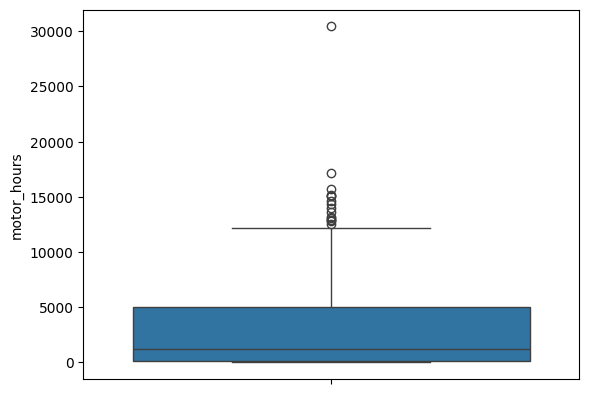

In [112]:
sns.boxplot(small_tractors['motor_hours'])

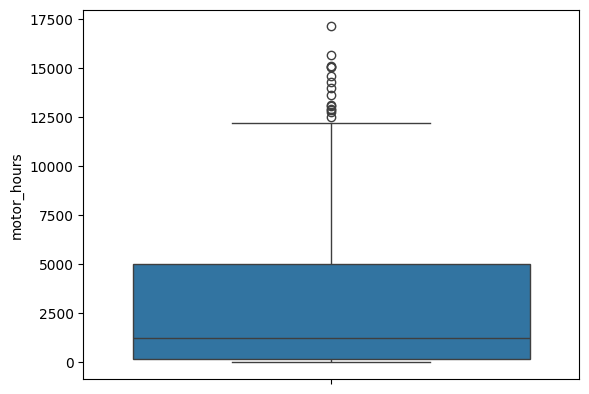

In [104]:

cols = ['motor_hours']
Q1 = small_tractors[cols].quantile(0.05)
Q3 = small_tractors[cols].quantile(0.95)
IQR = Q3 - Q1

small_tractors = small_tractors[~((small_tractors[cols] < (Q1 - 1.5 * IQR)) |(small_tractors[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.boxplot(small_tractors['motor_hours'])
plt.show()